# Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

The dataset have 1338 rows and 7 columns

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

The dataset have 7 columns

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

We can see that datatypes of all columns are correct

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can observe that there is no null values in dataset

In [7]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# Encoding Categorical columns

## Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
cols=['sex','smoker','region']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


We encoded categorical columns using label enocders

# EDA 

## Visualisation of Data(categorical columns)

1    676
0    662
Name: sex, dtype: int64


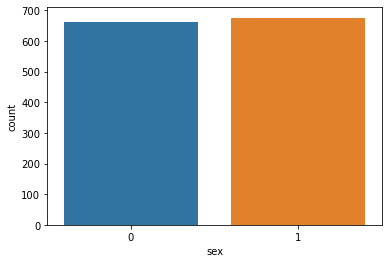

In [9]:
ax=sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

We can see that no of male is :676 and no. of females is :662

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


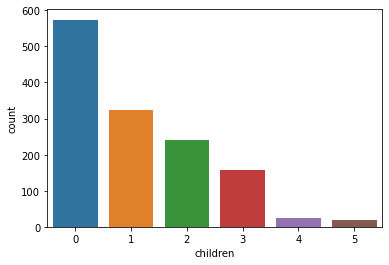

In [10]:
ax=sns.countplot(x='children',data=df)
print(df['children'].value_counts())

We can see parents  that have  no.of children  with

    0 childs-:574 parents
    1 childs-:324 parents
    2 childs-:240 parents
    3 childs-:157 parents
    4 childs-:25 parents
    5 childs-:18 parents
    
    

0    1064
1     274
Name: smoker, dtype: int64


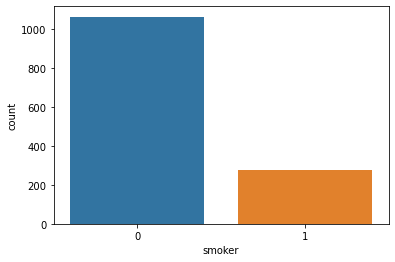

In [11]:
ax=sns.countplot(x='smoker',data=df)
print(df['smoker'].value_counts())

We can observe that no. of non smokers are 1064 and no. of smokers are: 274

2    364
3    325
1    325
0    324
Name: region, dtype: int64


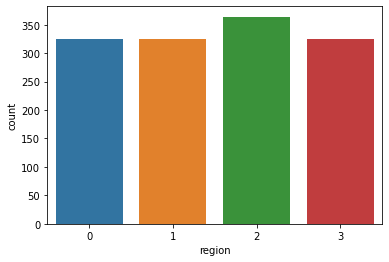

In [12]:
ax=sns.countplot(x='region',data=df)
print(df['region'].value_counts())

We can observe that people from  southeast region is 364,southwest region is 325,north east region is 325 and southwest region is 324

## Visualisation of Data(continous columns)

In [13]:
df_continous=df[['age','bmi','charges']]

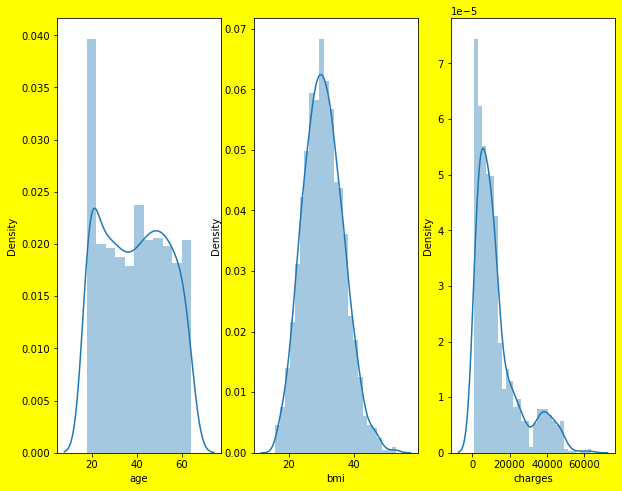

In [14]:
plt.figure(figsize=(10,8),facecolor='yellow')
plotnumber=1

for column in df_continous:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(df_continous[column])
    plotnumber=plotnumber+1

plt.show()

We can see that for age columns data is normally distributed with age values bwtween 20-60

For bmi column the data is normally distributed.
For charges column the data is mostly right skewed.


# Checking For skewness

In [15]:
df.skew().sort_values()

region     -0.038101
sex        -0.020951
age         0.055673
bmi         0.284047
children    0.938380
smoker      1.464766
charges     1.515880
dtype: float64

We can observe that the skewness of charges is high but we dont remove skewness from target variable

For rest of the columns the skewness values is within the limit

# Checking for Corrrelation

## Checking the correaltion with target variable and between features

### Plotting heatmap

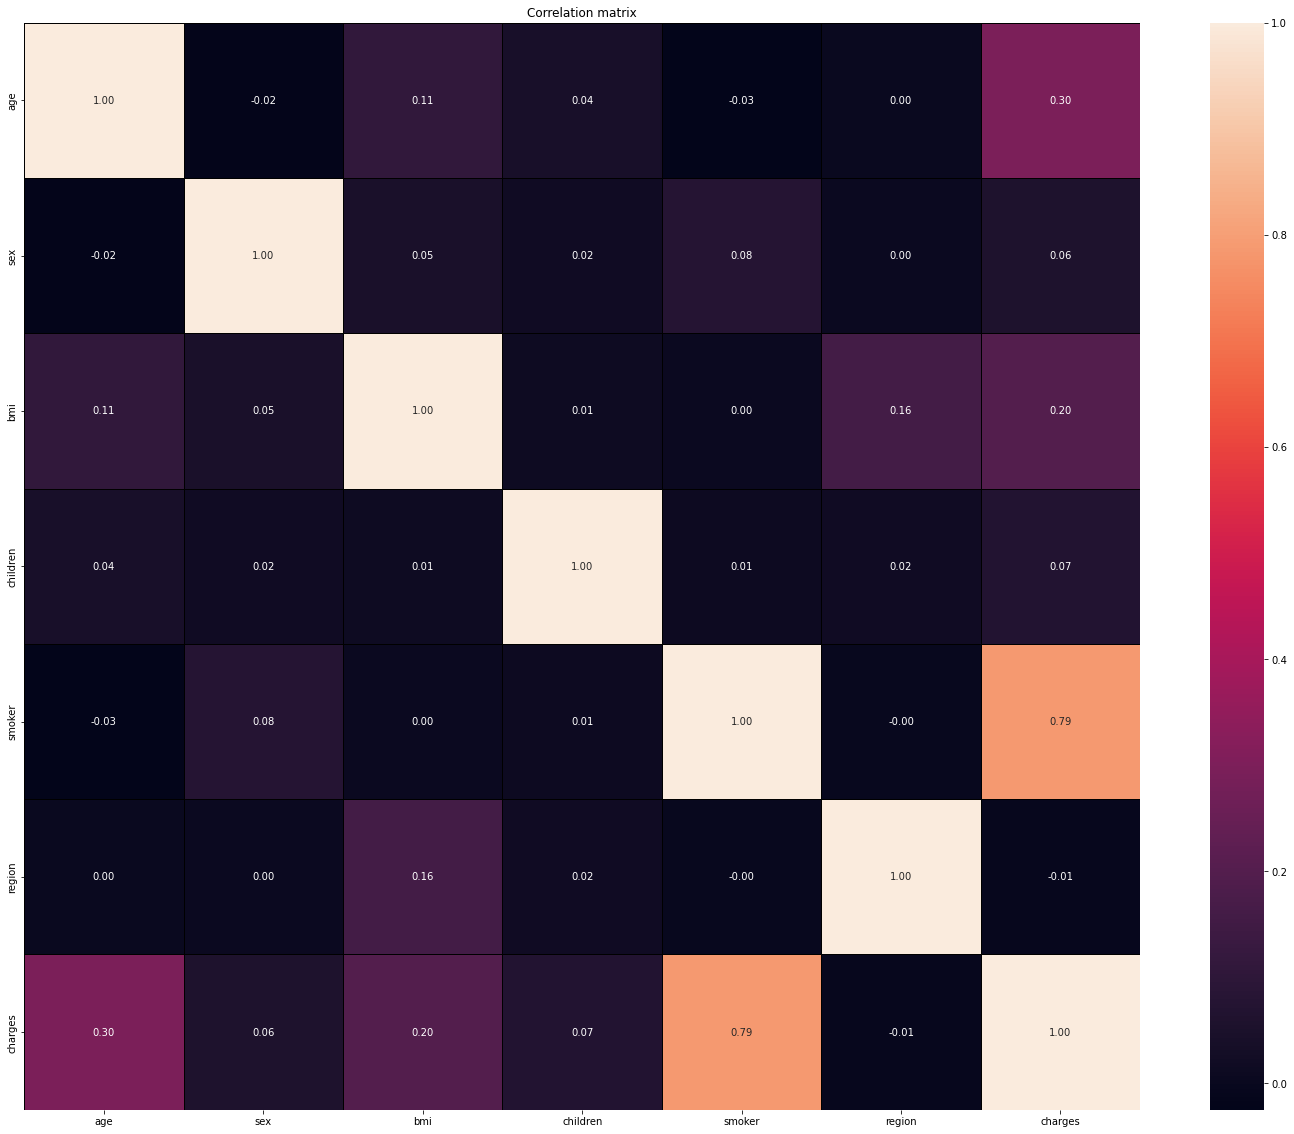

In [16]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.savefig('Correlation matrix.jpg')
plt.show()

We can observe that smoker column is having highest correlation with target variable with 79% and region columns is having lowest relationship with target variable with percentage (1%)

# Checking the columns which are positively and negatively related to target varibale

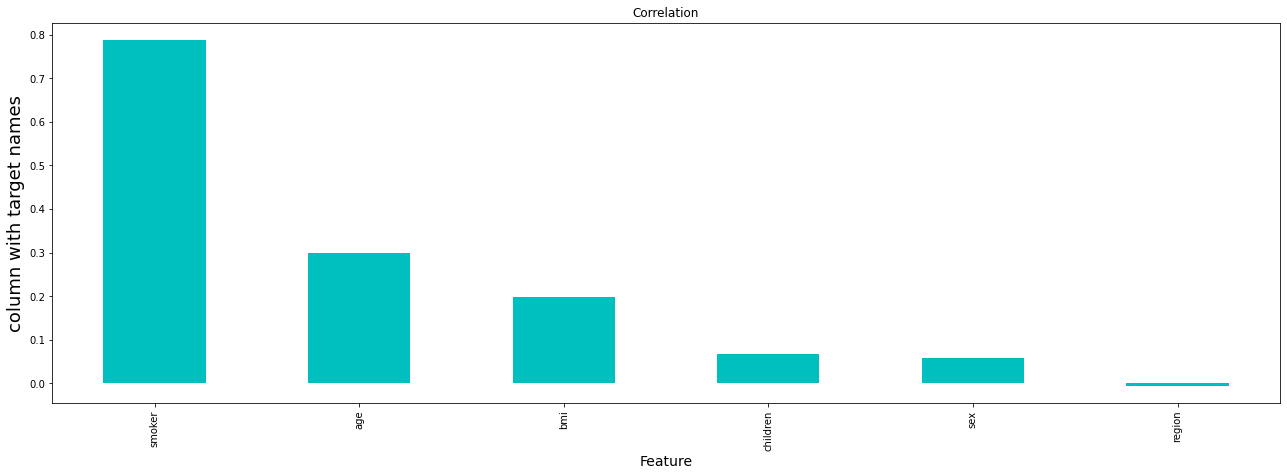

In [17]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=18)
plt.title('Correlation')
plt.show()



# Checking for outliers

<AxesSubplot:>

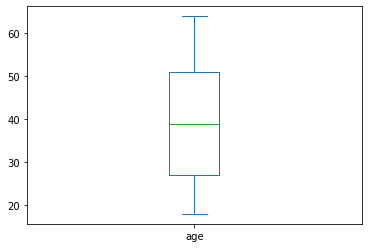

In [18]:
df['age'].plot.box()

No outliers in age column

<AxesSubplot:>

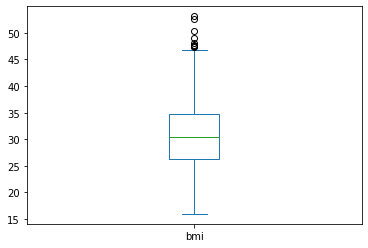

In [19]:
df['bmi'].plot.box()

We can observe that we have outliers in bmi columns

<AxesSubplot:>

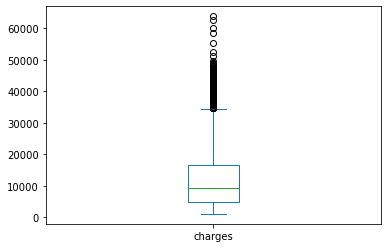

In [20]:
df['charges'].plot.box()

We have lots of outliers values in target varibale

# Preprocessing

## Removing outliers using z- technique

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape
z

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.220551
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,0.914002
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,0.961596
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,0.930362


In [22]:
threshold=3  # rule of thumb
#index number
print(np.where(z>3))
len(np.where(z>3)[0])

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


29

In [24]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print("total number of rows dropped",df.shape[0]-df_new.shape[0])

old dataframe (1309, 7)
new dataframe (1309, 7)
total number of rows dropped 0


Since 99% of the data lies between 3rd standard deviation .So we chose 3 as threshold

 We can observe that after outlier removal there are 29 no. of outliers are removed

In [26]:
df=df_new
df.shape

(1309, 7)

## Percentage data loss

In [27]:
loss_percent=(1599-1458)/1599*100
loss_percent

8.818011257035648

Data loss is less than 10% So its ok to remove outliers

# Separating label and features as x and y

In [28]:
x=df.drop(columns=['charges','region'],axis=1)
y=df['charges']

Removed region column as it is contributing very less to target variable

## Removing skewness using Datatransfromation

In [29]:
from sklearn.preprocessing import power_transform

In [30]:
x=power_transform(x,method='yeo-johnson')
x

array([[-1.52338838, -1.00536197, -0.41533151, -1.0686717 ,  1.98484827],
       [-1.61486488,  0.99466663,  0.56155224,  0.32286499, -0.50381685],
       [-0.76526073,  0.99466663,  0.43769977,  1.4202725 , -0.50381685],
       ...,
       [-1.61486488, -1.00536197,  1.04555528, -1.0686717 , -0.50381685],
       [-1.34540925, -1.00536197, -0.78526808, -1.0686717 , -0.50381685],
       [ 1.46003406, -1.00536197, -0.2142488 , -1.0686717 ,  1.98484827]])

In [31]:
pd.DataFrame(x).skew().sort_values()

0   -0.101636
2   -0.012857
1   -0.010708
3    0.098891
4    1.482731
dtype: float64

We can see that skewness is removed

In [32]:
x_new=pd.DataFrame(x)
x_new

,0,1,2,3,4
0,-1.523388,-1.005362,-0.415332,-1.068672,1.984848
1,-1.614865,0.994667,0.561552,0.322865,-0.503817
2,-0.765261,0.994667,0.437700,1.420272,-0.503817
3,-0.382755,0.994667,-1.354109,-1.068672,-0.503817
4,-0.457477,0.994667,-0.246671,-1.068672,-0.503817
...,...,...,...,...,...
1304,0.783431,0.994667,0.105252,1.420272,-0.503817
1305,-1.614865,-1.005362,0.261929,-1.068672,-0.503817
1306,-1.614865,-1.005362,1.045555,-1.068672,-0.503817
1307,-1.345409,-1.005362,-0.785268,-1.068672,-0.503817


# Data Standardisation

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [35]:
x_scaled=scaler.fit_transform(x_new)

# Check for multicolliernity

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x_new.columns
vif

,vif1,features
0,1.021950,0
1,1.008851,1
2,1.016803,2
3,1.007845,3
4,1.007859,4


We can see that vif is less than 5 for all columns so  there are no multicollierinity

# Training our model

## Linear Regression Regressor

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [39]:
lr=LinearRegression()

## Finding the best random state

In [40]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    y_train_pred=lr.predict(x_train)
    y_pred_test=lr.predict(x_test)
    print(f"At random state{i}, the training accuracy is :-{r2_score(y_train,y_train_pred)}")
    print(f"At random state{i}, the testing accuracy is :-{r2_score(y_test,y_pred_test)}")
    print("\n")
    

At random state0, the training accuracy is :-0.7383232626981107
At random state0, the testing accuracy is :-0.7864794303628455


At random state1, the training accuracy is :-0.7482550273950868
At random state1, the testing accuracy is :-0.7553101969241917


At random state2, the training accuracy is :-0.7590819659927489
At random state2, the testing accuracy is :-0.7114045681170514


At random state3, the training accuracy is :-0.751504929742894
At random state3, the testing accuracy is :-0.7420163113004092


At random state4, the training accuracy is :-0.7526183158942263
At random state4, the testing accuracy is :-0.7359632312195621


At random state5, the training accuracy is :-0.7517614594365002
At random state5, the testing accuracy is :-0.7406242841430994


At random state6, the training accuracy is :-0.7461351936351954
At random state6, the testing accuracy is :-0.7633564436672041


At random state7, the training accuracy is :-0.7565463351095689
At random state7, the testing accu

We can see that there is least difference between training accuracy and testing accuracy at radom state 1

# Train Test Split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=1)

In [44]:
lr=LinearRegression()



In [45]:
lr.fit(x_train,y_train)


LinearRegression()

In [46]:
pred_test_y=lr.predict(x_test)



In [47]:
print(r2_score(y_test,pred_test_y))

0.7553101969241917


Testing accurcy is 75.5%

# Finding best value for cross validation of the model

In [49]:
Train_accuracy=r2_score(y_train,y_train_pred)
Test_accuracy=r2_score(y_test,pred_test_y)


from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and the accuracy score in training is  {Train_accuracy} and the accuracy score in testing is {Test_accuracy}")

At cross fold 2 the cv score is 0.7473666611180607 and the accuracy score in training is  -0.7089249572340452 and the accuracy score in testing is 0.7553101969241917
At cross fold 3 the cv score is 0.7454719739499867 and the accuracy score in training is  -0.7089249572340452 and the accuracy score in testing is 0.7553101969241917
At cross fold 4 the cv score is 0.7434656605813895 and the accuracy score in training is  -0.7089249572340452 and the accuracy score in testing is 0.7553101969241917
At cross fold 5 the cv score is 0.7476631228509125 and the accuracy score in training is  -0.7089249572340452 and the accuracy score in testing is 0.7553101969241917
At cross fold 6 the cv score is 0.74530285961422 and the accuracy score in training is  -0.7089249572340452 and the accuracy score in testing is 0.7553101969241917
At cross fold 7 the cv score is 0.7447102693291201 and the accuracy score in training is  -0.7089249572340452 and the accuracy score in testing is 0.7553101969241917
At cro

At cv =5 there is less difference between training acccuracy and cv score

# Cross Validation

In [50]:
lssscore_selected=cross_val_score(lr,x_scaled,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.7454719739499867


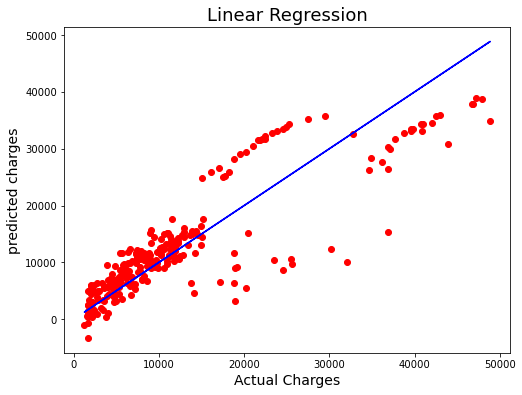

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_y,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()


## Best fit line covering most of the data points which shows good fit to our model.

# 

# Hyperparameter Tuning

## Using Grid Search Cv(Lasso)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge



In [56]:
parameters={'alpha':[0.0001,0.001,0.01,.1,1,10],
            'random_state':list(range(0,10)),
            'max_iter':[10,100,500,1000]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'alpha': 10, 'max_iter': 10, 'random_state': 0}


In [57]:
ls=clf.best_estimator_



In [58]:
pred_test_y=ls.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))



Testing Accuracy 0.7554178463283188


In [59]:
lssscore_selected=cross_val_score(ls,x_scaled,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.7455648099512441


We can see that after hyperparameter tuning testing accuracy is 75.54 and cross val score is  74.55

## Ridge

In [60]:
parameters={'alpha':np.arange(0.001,0.1,0.01),'random_state':[1,50],'max_iter':[100,500,1000,250]}

In [61]:
ridge=Ridge()
clf=GridSearchCV(ridge,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.09099999999999998, 'max_iter': 100, 'random_state': 1}


In [62]:
ridege=clf.best_estimator_

In [63]:
pred_test_y=ridege.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))


Testing Accuracy 0.7553114642537856


## Cross Val Score

In [64]:
lssscore_selected=cross_val_score(ridege,x_scaled,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.7454720540892043


We can see that after hyperparameter tuning testing accuracy is 75.54 and cross val score is  74.55

# Using Random Forest 

In [66]:
from sklearn.ensemble import RandomForestRegressor


In [67]:
rf=RandomForestRegressor()

rf.fit(x_train,y_train)

pred_test_y=rf.predict(x_test)
print("Testing Accuracy",r2_score(y_test,pred_test_y))


Testing Accuracy 0.835631713635967


## Cross val score

In [69]:
lssscore_selected=cross_val_score(rf,x_scaled,y,cv=3).mean()
print("the cv score is ",lssscore_selected)


the cv score is  0.8240431250604549


# Hyperparameter Tuning



In [70]:
params={'n_estimators':[10,15],
       'max_depth':[10,20],
       'min_samples_split':[6,7,8]}

In [71]:
clf=GridSearchCV(rf,params)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'max_depth': 20, 'min_samples_split': 7, 'n_estimators': 15}


In [72]:
rf=RandomForestRegressor(max_depth=20,min_samples_split=7,n_estimators=15)

rf.fit(x_train,y_train)

pred_test_y=rf.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))

lssscore_selected=cross_val_score(rf,x_scaled,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

Testing Accuracy 0.8441680831447163
the cv score is  0.8335520005602098


# Using KNN 

In [74]:
from sklearn.neighbors import KNeighborsRegressor





In [75]:
knn=KNeighborsRegressor()

knn.fit(x_train,y_train)

pred_test_y=knn.predict(x_test)
print("Testing Accuracy",r2_score(y_test,pred_test_y))



Testing Accuracy 0.8064810062090035


## Cross val score

In [77]:
lssscore_selected=cross_val_score(knn,x_scaled,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8073745536043552


# Hyperparameter Tuning

In [78]:
params={'leaf_size':[2,3,4,5,6,7,8,9],
       'n_neighbors':[3,5,7,9],
       'algorithm':['kd_tree','brute','ball_tree']}





In [79]:
clf=GridSearchCV(knn,params)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 2, 'n_neighbors': 9}


In [80]:
knn=KNeighborsRegressor(algorithm='kd_tree',leaf_size=2,n_neighbors=9)

knn.fit(x_train,y_train)

pred_test_y=knn.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))

Testing Accuracy 0.8158504194125388


In [81]:
lssscore_selected=cross_val_score(knn,x_scaled,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8189074567737347


# Using Adaboost

In [82]:
from sklearn.ensemble import AdaBoostRegressor






In [83]:
ada=AdaBoostRegressor()

ada.fit(x_train,y_train)

pred_test_y=ada.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))

Testing Accuracy 0.7855773931774142


## Cross val score

In [84]:
lssscore_selected=cross_val_score(ada,x_scaled,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.810827531824505


# Hyperparameter Tuning

In [85]:
params={'n_estimators':[20,30,40,50,60,70],
       'learning_rate':[0.15,0.2,0.25,0.3,0.35,0.5,0.6],
       'random_state':[1,100]}







In [86]:
clf=GridSearchCV(ada,params)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.15, 'n_estimators': 20, 'random_state': 1}


In [87]:
ada=AdaBoostRegressor(learning_rate=0.15,n_estimators=20,random_state=1)

ada.fit(x_test,y_test)

pred_test_y=ada.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))

Testing Accuracy 0.8672721098310832


In [88]:
lssscore_selected=cross_val_score(ada,x_scaled,y,cv=3).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.8306764831781647


# Conclusion

#### We can conclude that KNN is the best model for this dataset as it is having least difference between testing accurcy and cross val score

# Saving the best model

In [90]:
import pickle

pickle.dump(lr,open('regmodel_insurance','wb'))